# 1 Difference Equations

Simulating models based on a difference equation is straightforward: simply apply the given equation over and over again, in an iterative way. After every step, the result needs to be stored in an appropriate data structure (list, numpy array).

As a light start into this tutorial this is ideal, as you can focus on familiarising yourselves with the programming environment, before getting into more complicated issues.

In [1]:
# imports: so far only the matplotlib plotting library
%matplotlib notebook
import matplotlib.pyplot as plt

### 1.1 First-order difference equation: Cobweb model

In the first exercise, we are going to look at a simple first-order difference equation, the basic version of the Cobweb model from the first tutorial. The equation reads

$p_t = -\frac{\delta}{\beta}p_{t-1}+\frac{\alpha + \gamma}{\beta}$

It is generally good practice in programming to separate different parts of the procedure, so it is easier to keep a good overview of the code. Code that is used multiple times should be wrapped in a function. In this case, a single line (the equation) suffices for the single time step and hence it wouldn't be so necessary to write a separate function for it. However, it still seems appropriate to break up the problem into smaller parts, at least for educational purposes.

##### EXERCISE

Write the function for 1 time step (i.e. from time $t$ to $t+1$) in the cell below. It takes as arguments the current price, as well as the model parameters $\alpha$, $\beta$, $\gamma$, $\delta$, and returns the next period's price.

##### SOLUTION

The solution in this case is straightforward: implement the given equation, return the result.

In [2]:
def Cobweb_1step(p_t, alpha, beta, gamma, delta):
    return -(delta / beta) * p_t + ((alpha + gamma) / beta)

##### EXERCISE

Now we have to iterate this equation several times in order to analyse the dynamic behaviour of the model. Write a for loop that applies your 1-step function $T$ times ($T$ and the model parameters are defined below, feel free to play around with the values) and store the results in the results list.

In [3]:
# number of steps to iterate through
T = 10

# model parameters
alpha = 2
beta = 0.75
gamma = 1.5
delta = 1

# initial price
p_0 = 1

# initialise results list (empty at first)
results = list()
# insert initial price in results list
results.append(p_0)

# for loop to apply model function iteratively T times
for t in range(T):
    # calculate new price
    p_new = Cobweb_1step(results[-1], alpha, beta, gamma, delta)
    results.append(p_new)
    # alternatively: both steps in one line
    # results.append(Cobweb_1step(results[-1], alpha, beta, gamma, delta))

To check what happens, you can print the list of results, or plot the time series. Below, I provide code for both. What happens if you start in the steady state instead of the given initial price? How can you change the model behaviour, e.g. such that it becomes stable?

In [4]:
print(results)

[1, 3.333333333333334, 0.22222222222222232, 4.37037037037037, -1.1604938271604928, 6.213991769547324, -3.6186556927297646, 9.491540923639686, -7.988721231519581, 15.318294975359443, -15.757726633812588]


<IPython.core.display.Javascript object>


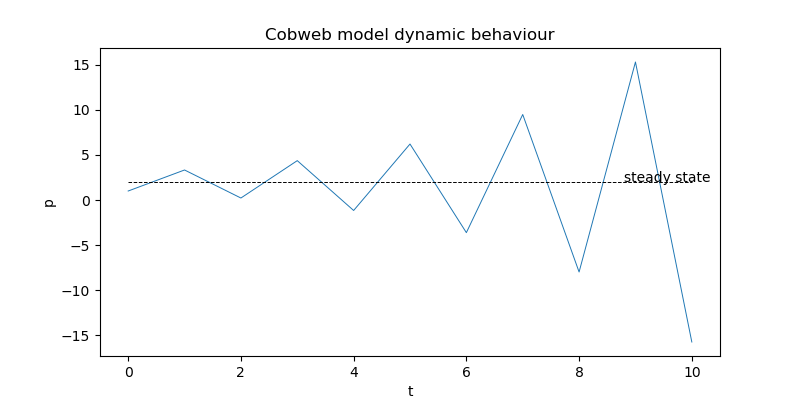

Text(0, 0.5, 'p')

In [5]:
steady_state = (alpha + gamma) / (beta + delta)

# initialise figure
plt.figure(figsize=(8,4))
plt.title("Cobweb model dynamic behaviour")

# plot results with slightly thinner linewidth than default (looks nicer in my opinion)
plt.plot(results, linewidth=0.7)

# horizontal line to indicate steady state
plt.hlines(steady_state, 0, T, lw=0.7, linestyle="--", color='black')

plt.text(T-1.2, steady_state, "steady state")

# axis labels
plt.xlabel("t")
plt.ylabel("p")

As you can see, with the diverging oscillations eventually lead to negative prices. This may not be economically sensible, but doesn't need to concern us at this point.

### 1.2 Second-order difference equation

Here we are looking at the equation of exercise 0 c) (ii) in the first tutorial:

$y_t = 1.1y_{t-1} - 0.6y_{t-2} + 1100$.

##### EXERCISE

Write a function that implements one time step, then apply this function iteratively to simulate the model's behaviour over time.

Instead of implementing it strictly with the parameters 1.1, -0.6 and 1100, leave these as abstract parameters a, b, and c. That way, you can change your model parameters more easily and check how the model changes.

##### SOLUTION

The implementation amounts to a simple return statement with the given equation, just as above.

In [6]:
def second_order_1step(y_1, y_2, a, b, c):
    return a * y_1 + b * y_2 + c

##### EXERCISE

Run this model $T$ times (write a for loop)

In [7]:
# initial conditions, store in results list right away
results2 = [1300, 1600] # different name than the list last time

# model parameters
a = 1.1
b = -0.6
c = 1100

# number of times steps to be performed
T = 25

# apply one step T times
for t in range(T):
    results2.append(second_order_1step(results2[-1], results2[-2], a, b, c))

#### Plotting the results

<IPython.core.display.Javascript object>


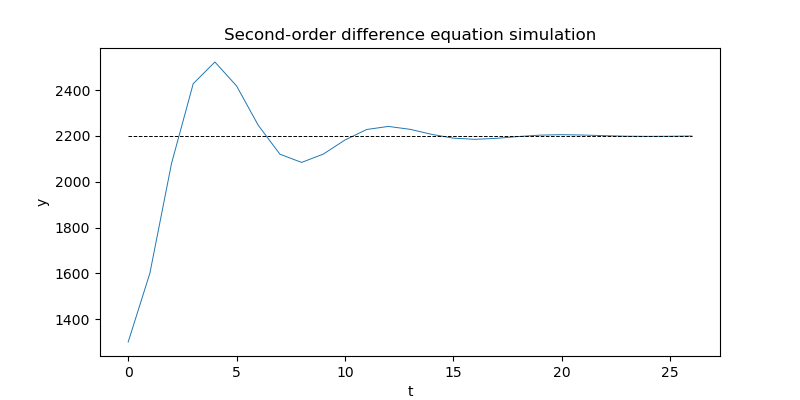

Text(0, 0.5, 'y')

In [8]:
# steady state
ss = 1100 / (1 - a - b)

plt.figure(figsize=(8,4))
plt.title("Second-order difference equation simulation")
plt.plot(results2, lw=0.7)
plt.hlines(ss, 0, T+1, ls="--", lw=0.7, color="black")
plt.xlabel("t")
plt.ylabel("y")

### Bonus

Implement and plot any other model form the first tutorial or the additional exercise, section 1. Plot the results to find out how it behaves.